# MACHINE LEARNING AND STATISTICS PROJECT

## THE BOSTON HOUSE PRICES DATASET

## HUGH O'REILLY

## H.DIP Data Analytics GMIT


## INTRODUCTION

 

___

The Boston Housing Dataset consists of information derived from US census data of housing in the Boston Mass. area of the US. The publication originally discussed the problems associated with the use of housing market data to measure the willingness to pay for clean air.

The data was originally published by Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Ref [https://www.sciencedirect.com/science/article/abs/pii/0095069678900062%5D]
___

## OBJECTIVE

* To investigate if there is a significant difference in the median house prices between houses that are along the Charles River and those which aren't

* To attempt to predict the median house price based on other variables in the dataset

Understanding if there is a difference between the houses along the Charles River will help determine the investment value of properties in the area

Similarly the ability to predict median house prices for a particular zone in Boston, based on the other variables associated with the property will enable us to determine the value of a property in a particular area and whether it may be worth investing in the area

#TODO Insert image of boston

## IMPORT AND SORT THE DATASET

___


In [1]:
#IMPORT LIBRARIES

#Scipy Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import keras as kr
%matplotlib inline

#IMPORT THE BOSTON HOUSE PRICES DATASET from sklearn
   
from sklearn.datasets import load_boston
boston = load_boston()

# Display the shape of the dataset
print(boston.data.shape)

# Ref [2]


Using TensorFlow backend.


(506, 13)


### Investigate the Dataset type
___

In [2]:
#Determine the dataset type

type(boston)

sklearn.utils.Bunch

The `type(boston)` command tells us that the dataset is a `sk.utils.Bunch` dataset type

A 'bunch' dataset type:  Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the classification labels, ‘target_names’, the meaning of the labels, ‘feature_names’, the meaning of the features, ‘DESCR’, the full description of the dataset, ‘filename’. 

Ref [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html]

In [3]:
#Display a desciption of the dataset

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The Data consists of 506 rows and 13 columns i.e. 506 instances containing 13 numeric/categorical variables as described above. 

There are 13 attribute variables an 1 target variable 'MEDV': which represents the median value for houses in each area i.e. 506 areas of Boston

In [4]:
# Show the first 10 rows of the Dataset
bos = pd.DataFrame(boston.data)
bos.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


It can be seen above that the dataset has no feature labels which will need to be added (although they are imported in the 'dataset characteristics'). In order to do so we need to use the `pandas.dataframe.keys()` command to access the keys and then assign them to the attribute columns.

Ref [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.keys.html]

In [5]:
# Identify the indices in the dataset

bos.keys()

RangeIndex(start=0, stop=13, step=1)

In [6]:
#Passing the `feature_names` parameter to the dataset now assigns the attributes with their labels

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Only 13 attributes are shown, although 14 attributes are associated with the dataset. The 14th attribute, or target variable - MEDV     Median value of owner-occupied homes in $1000's must be added to the `bos` pandas array

In [7]:
#The price is identified as the target variable above so we will see if is there

boston.target #This prints the array of target variables (MEDV)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
#We now add the target variable (MEDV) to the array as 'price'

bos['PRICE'] = boston.target
print(bos.head())

#ref [https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## DESCRIPTIVE STATISTICS
___

In [9]:
#Table with summary statistics of the dataset

bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Selected Observations from the Summary Stats Table
___

* **The target variable - 'PRICE' has a range of $5000 - $50000 with a mean of $22,532 which is a significant variation in house prices across the city.**


* The 'CHAS' variable - proximity to the Charles River is logisitic in nature (i.e. 1 or 0)


* Per Capita crime rate varies significantly across the city from 0.00632 to 88.9762

### Distribution of Prices Data
___

In [10]:
#Set the target variable to y

y = bos['PRICE']*1000

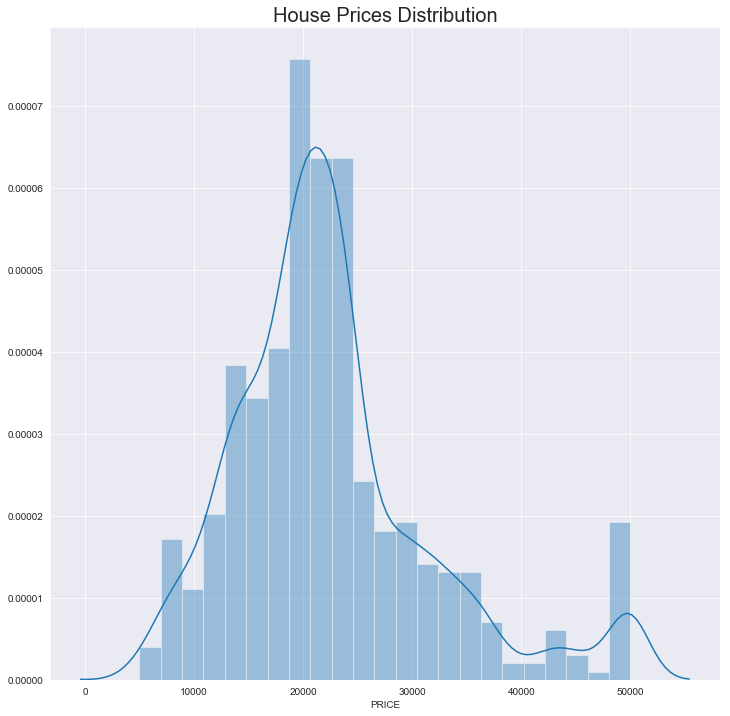

In [11]:
#Use the Seaborn library to display the distribution of house prices
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
plt.title('House Prices Distribution', size=20)
ax = sns.distplot(y)

The plot above which displays the distribution of house prices in the dataset 'appears' to follow a **normal distribution.**

**Some other observations**

* The highest distribution is centred approximately around the mean ($20,000)

* There are a notably high number of houses around the max ($50,000)

Although the prices 'look' like they follow a normal distribution i.e. a bell-curve or gaussian distribution, it would be prudent to definitively determine the distribution as the distribution of the data will determine what inferential statistical analysis should be carried out.- **we will next carry out a test for normality.**

**Shapiro-Wilk Test for Normality**

The Shapiro-Wilk test tests the null hypothesis $H_0$ that the sample comes from the normal distribution. Therefore at a significance level of 0.05 a $p$ < 0.05 indicates non-normality
Ref[http://www.bios.unc.edu/~mhudgens/bios/662/2008fall/Backup/wilkshapiro1965.pdf]

In [12]:
from scipy.stats import shapiro #import the Shapiro-Wilks function

shapiro_test = shapiro(y) #run the Shapiro Wilks tets on the house price data

stat, p = shapiro_test
print('Test Statistic=%.3f, p=%.4f' % (stat, p))

Test Statistic=0.917, p=0.0000


The Shapiro-Wilk test above *rejects* the null hypothesis since the *p* value is less than 0.05, therefore the data for 'PRICE' is not normally distributed. In addition the test statistic is 0.917 which indicates that this result is likely valid and not a type 1 error. Further visualisation may be carried out using a **Q-Q plot**

A Q-Q plot plots quantiles (values that split a data set into equal portions of the data) against the theoretical quantiles of a normal distribution. 

Ref[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/?source=post_page-----6bf06ed646a9----------------------]

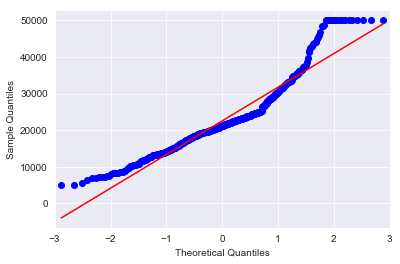

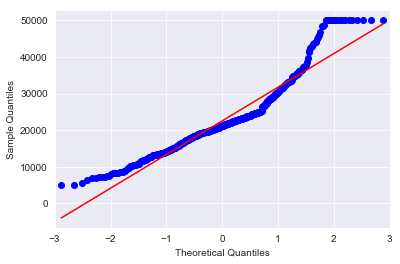

In [13]:
sm.qqplot(y, line='s') #generate a q-q plot of the house price data

Investigating possible reasons for the non-normality of the 'PRICES' data and specifically what, if any effects are causing the skew of data towards higher value houses may be worthwhile.

### Relationships Between Variables
___

A correlation heatmap is a useful way to quickly visualise the relationships between variables and determine which variables are highly correlated and worth further investigation.

Ref [https://seaborn.pydata.org/generated/seaborn.heatmap.html]


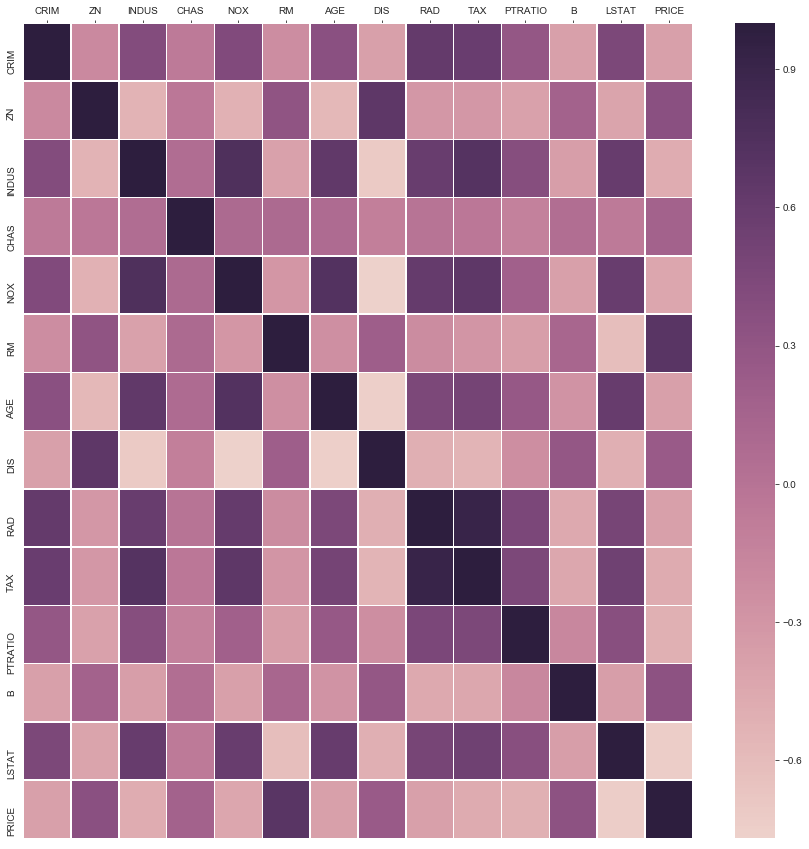

In [14]:
plt.figure(figsize=(15, 15)) #sets the parameters for the figure size 
ax = sns.heatmap(bos.corr(), cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5) #generates heatmap, colour scheme and linewidth
ax.xaxis.tick_top() #sets the axis to the top of the chart for easier reading

The above correlation matrix highlights some interesting relationships between the target variable, PRICE and other variables:

* There is a high positive correlation between PRICE and RM - (Average number of rooms per dwelling)

* There is a negative correlation between PRICE and LSTAT - (% lower status of the population)

The correlation matrix is only relevant to variables where there is a integer value. The Charles river variable is logistic in nature (i.e. 1 or 0) so is not relevant to this analysis.

## INFERENTIAL STATISTICS

We will now use inferential statistics to analyse the relationship between the median house prices 'PRICE' ('MEDV'in the original dataset) and whether or not the houses border the Charles river 'CHAS'

In [15]:
# Split the data into house proces which border the River and those who dont
    
River = bos.loc[bos['CHAS'] != 0]
Not_River = bos.loc[bos['CHAS'] != 1]

In [16]:
#Create 2 Arrays of Prices along River and not along river

River_Price = River['PRICE']
Not_River_Price = Not_River['PRICE']

In [17]:
#Summary statistics for house prices bordering river
River_Price.describe().T


count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: PRICE, dtype: float64

In [18]:
#Summary statistics for house prices not bordering river
Not_River_Price.describe().T

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: PRICE, dtype: float64

I can be seen above that in simple terms, the mean house price of houses bordering the river is 28,440 dollars whereas the mean house price of houses not bordering the river is 22,093 dollars.

We will take a further look at how both sets of prices are distributed, using boxplots

### BOX PLOTS OF HOUSE PRICES BORDERING/NOT BORDERING RIVER

Text(0.5,1,'House Prices Not Bordering River and Bordering River')

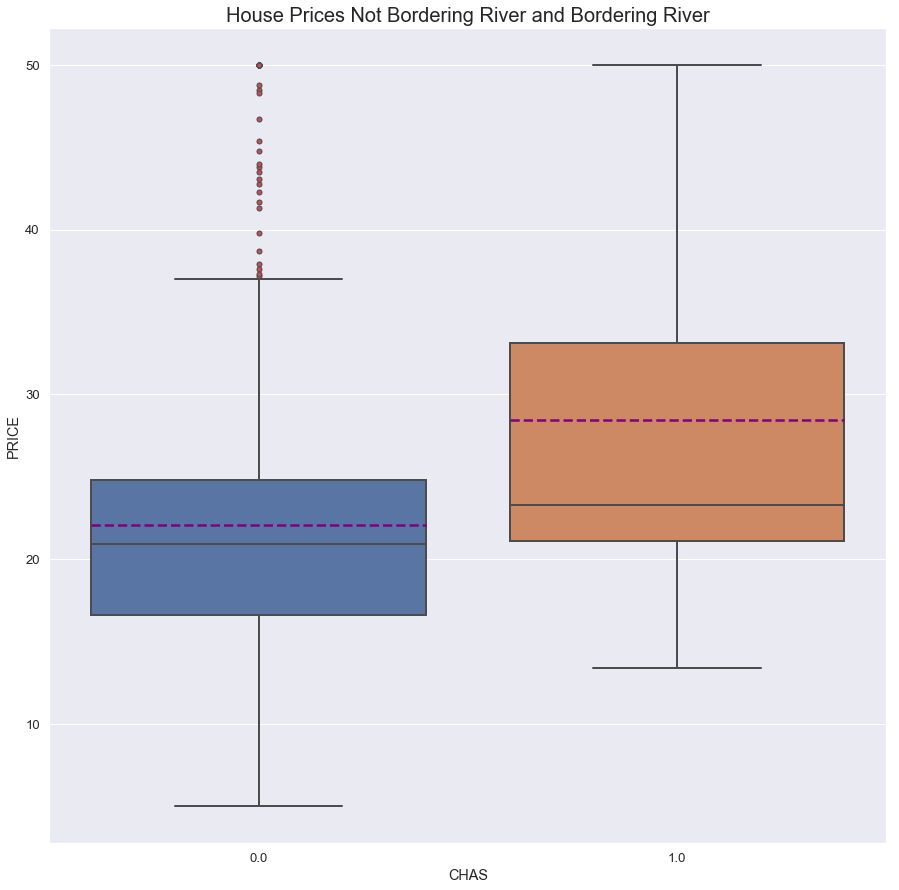

In [19]:
plt.figure(figsize=(15, 15))
red_circle = dict(markerfacecolor='r', marker='o')
sns.set(font_scale=1.2)
ax=sns.boxplot(x="CHAS", y="PRICE",data=bos, linewidth=2.0, flierprops=red_circle, showmeans=True , meanline=True, meanprops = dict(linestyle='--', linewidth=2.5, color='purple'))
ax.set_title('House Prices Not Bordering River and Bordering River', size=20)


The boxplots of the median house price for houses bordering the river (CHAS=1) and those not bordering the river (CHAS=0) appear quite different, suggesting that it may be worth investigating if this difference is statistically significant.
* The array containing houses not bordering the river has a number of outliers at the upper end
* The array containing houses bordering the river has a mean which is higher than those not bordering the river (**purple dashed line in boxplot**). Additionally, the mean of house prices bordering the river is significantly higher than the median compared to the house prices of those not bordering the river.

### DISTRIBUTION PLOTS OF HOUSE PRICES BORDERING/NOT BORDERING RIVER

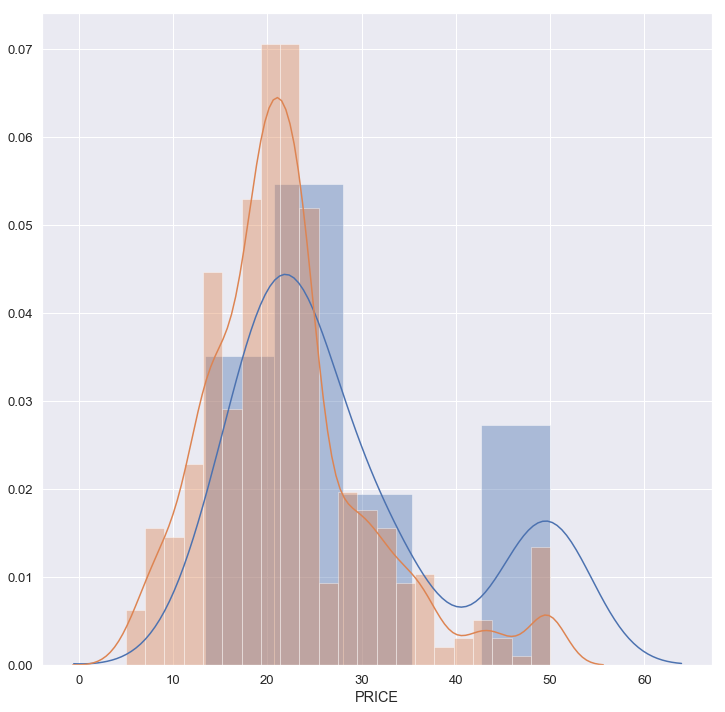

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
ax1 = sns.distplot(River_Price)
ax2 = sns.distplot(Not_River_Price)

The distribution plots of house prices bordering/not bordering the river don't highlight the differences in the two datasets as well as the boxplots do, but the distributions illustrate how both distributions have a similar shape

### NORMALITY CHECK ON HOUSE PRICES BORDERING/NOT BORDERING RIVER

In [21]:
#Check the two house price data sets for normality using the Shapiro-Wilks test

shapiro_test1 = shapiro(Not_River_Price) 
shapiro_test2 = shapiro(River_Price) 

stat1, p1 = shapiro_test1
stat2, p2 = shapiro_test2
print('Test Statistic : Not Bordering River =%.3f, p=%.4f' % (stat1, p1))
print('Test Statistic : Bordering River =%.3f, p=%.4f' % (stat2, p2))

Test Statistic : Not Bordering River =0.928, p=0.0000
Test Statistic : Bordering River =0.836, p=0.0001


The normality test of the house prices bordering/not bordering the river both suggest that we can reject the null hypothesis, $H_0$, and accept the alternative hypothesis, $H_1$, the two sets are non-normal

**Although the data displays non-normality, (and the presence of outliers) - parametric tests of the house prices are still suitable due to the large sample sizes we have** 

REF [https://blog.minitab.com/blog/understanding-statistics/data-not-normal-try-letting-it-be-with-a-nonparametric-hypothesis-test]

This is also a satisfactory approach since the **Central Limit Theorem** states that given a sufficiently large sample size from a population (usually more than 30) with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

**CENTRAL LIMIT THEOREM**

If X1, X2,...Xn is a random sample of size n taken from a population (either finite
or infinite) with mean $u$ and finite variance $\sigma^2$ , and if $\bar X$ is the sample mean, the limiting
form of the distribution of

$Z$ = $\frac{\bar X - u} {\frac{\sigma}{\sqrt n}}$


as n -->0, is the standard normal distribution.

REF[Applied Statistics and Probability for Engineers.; Montgomery,D.C.; Wiley; 2003]

### PAIRED T-TEST

In [22]:
#Carry out a paired t-test on the house prices bordering/not bordering the river

stats.ttest_ind(Not_River_Price, River_Price)

stat, p = stats.ttest_ind(Not_River_Price, River_Price)
print('Test Statistic = %.3f, p=%.4f' % (stat, p))

# REF [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html]

Test Statistic = -3.996, p=0.0001


A Test Statistic of -3.996 and  $p$ value of p=0.0001 suggest that we can reject the null hypothesis of equal means.

Therefore we can conclude that there is a difference in the mean house price between houses bordering the Charles River and those not bordering the Charles River

the following analysis was used as the basis for our investigation of descriptive and inferential statistics:

REF: [https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset]

# PREDICT 



## NEURAL NETWORK USING KERAS

In this section we will attempt to predict the house prices based on other variables using the Keras Neural Network library

REF [https://keras.io/]

In [23]:
#Import relevant Keras libraries

#import the sequential model
from keras.models import Sequential
from keras.models import Model

from keras import optimizers 

#import the relevent layer types and activation
from keras.layers import Dense, Activation
# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

#Create a new sequential model
model = Sequential()

# Add an input and 2 hidden layers -with 1 output. number of neurons set to number of attributes

model.add(Dense(48, input_shape=(13,), activation="relu"))

kr.layers.BatchNormalization()

model.add(Dense(48, activation="relu"))

kr.layers.BatchNormalization()

model.add(Dense(24, activation="relu"))

model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 48)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


**BUILD THE MODEL**

We will experiment with 1 input layer with 13 neurons, 1 hidden layer with 6 neurons and 1 output layer. The input shape is the number of variables i.e. 13. The activation function is `relu` - Rectified Linear Unit. This activation function normalises the inputs.

In [24]:
#Set the x and y parameters for independent and dependent variables

x = bos[['CRIM', 'INDUS', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'TAX']]
y = bos[['PRICE']]

**COMPILE THE MODEL**

Gradient descent is an optimisation algorithm which works by changing parameters of the input functions such as weights until the loss function converges on a minimum.

The model is compiled using a Stochastic Gradient Descent optimiser `sgd` and the loss function used here is Mean Square Error `mse`

* **Stochastic Gradient Descent optimiser**, as the name suggests picks a random instance in the training set and computes the gradient based only on that instance. This is in contrast to 'Batch gradient descent which uses the entire dataset to calculate the gradients which is slow (for a large dataset). Due to its random nature, the cost function for stochastic gradient descent will increase and decrease, over time approaching its minimum.
  

* **Mean Square Error** is a useful loss function for regression problems where a value is predicted from continuous variables.
 
    REF [Applied Deep Learning with Python By Alex Galea, Luis Capelo August 2018]
    
    REF [Hands-On Machine Learning with Scikit-Learn, KERAS & TensorFlow; Geron, A.; O'Reilly; 2019, 2nd Ed]

**Attempt to adjust learning rate to get better cost value**

In [25]:
#compile the model specifying the model optimiser and loss function

#LEARNING RATE PARAMETERS
sgd = optimizers.SGD(lr=0.01, clipnorm=1.0)
Adam = kr.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)


#changed to 'Adam' optimiser
model.compile(optimizer="Adam", loss ="mse")

**CREATE A TRAINING AND TESTING SET**

Like all regression problems it is necessary to create a training `x_train` , `y_train` and testing set `x_test`, `y_test` with which to train the model to create predictions of our output variable and a testing set to test the accuracy of the predictive model we have created.

We have specified a `test_size` of 0.5 i.e. half the data will be used to test the model.

In [26]:
# Define our training set

x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.5)

`model.fit` Trains the model over a fixed number of epochs

**epochs**: are the number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

REF[https://keras.io/models/model/]

`EarlyStopping` stops the model when it doesnt improve the cost function after a specified number of epochs of same loss value. `patience` defines the number of epochs of same loss value before stopping

REF [https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37]

validation model also added
#TBD - Discuss validation

**GRADIENT DESCENT**



In [27]:
#Fit the model to the training set and calculate loss

#Import early stopping -
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)

#train model

hist = model.fit(x_train, y_train, validation_split=0.2, epochs=1000)#, callbacks=[early_stopping_monitor])

#Calculate the predictions on the test: set x_test which is 0.5 of the entire set
preds = model.predict(x_test)

#Evaluate the performance of the model - output the loss function
evals = model.evaluate(x_test, y_test)
print ("Loss value is:", float("{0:.2f}".format(evals)))

Train on 202 samples, validate on 51 samples
Epoch 1/1000
202/202 [==============================] - 0s 469us/step - loss: 457.1569 - val_loss: 323.0523
Epoch 2/1000
202/202 [==============================] - 0s 49us/step - loss: 236.9978 - val_loss: 217.6057
Epoch 3/1000
202/202 [==============================] - 0s 49us/step - loss: 178.5862 - val_loss: 178.0614
Epoch 4/1000
202/202 [==============================] - 0s 54us/step - loss: 151.9514 - val_loss: 120.2674
Epoch 5/1000
202/202 [==============================] - 0s 49us/step - loss: 127.6788 - val_loss: 104.4842
Epoch 6/1000
202/202 [==============================] - 0s 49us/step - loss: 118.8210 - val_loss: 81.4275
Epoch 7/1000
202/202 [==============================] - 0s 50us/step - loss: 117.2167 - val_loss: 75.4360
Epoch 8/1000
202/202 [==============================] - 0s 54us/step - loss: 105.0719 - val_loss: 75.0650
Epoch 9/1000
202/202 [==============================] - 0s 64us/step - loss: 94.7968 - val_loss: 73.6

202/202 [==============================] - 0s 44us/step - loss: 50.3249 - val_loss: 47.4653
Epoch 78/1000
202/202 [==============================] - 0s 50us/step - loss: 41.4743 - val_loss: 55.6797
Epoch 79/1000
202/202 [==============================] - 0s 40us/step - loss: 42.0421 - val_loss: 43.5978
Epoch 80/1000
202/202 [==============================] - 0s 54us/step - loss: 36.8644 - val_loss: 40.2323
Epoch 81/1000
202/202 [==============================] - 0s 49us/step - loss: 37.5249 - val_loss: 40.5824
Epoch 82/1000
202/202 [==============================] - 0s 44us/step - loss: 38.7889 - val_loss: 41.3247
Epoch 83/1000
202/202 [==============================] - 0s 44us/step - loss: 37.1106 - val_loss: 43.4506
Epoch 84/1000
202/202 [==============================] - 0s 45us/step - loss: 36.7746 - val_loss: 38.6236
Epoch 85/1000
202/202 [==============================] - 0s 49us/step - loss: 36.1723 - val_loss: 38.7707
Epoch 86/1000
202/202 [==============================] - 0s 

202/202 [==============================] - 0s 39us/step - loss: 24.2187 - val_loss: 30.5215
Epoch 154/1000
202/202 [==============================] - 0s 40us/step - loss: 24.8502 - val_loss: 30.5860
Epoch 155/1000
202/202 [==============================] - 0s 49us/step - loss: 22.5386 - val_loss: 35.0306
Epoch 156/1000
202/202 [==============================] - 0s 40us/step - loss: 35.9498 - val_loss: 33.1281
Epoch 157/1000
202/202 [==============================] - 0s 44us/step - loss: 32.0625 - val_loss: 30.3123
Epoch 158/1000
202/202 [==============================] - 0s 49us/step - loss: 26.2893 - val_loss: 32.0208
Epoch 159/1000
202/202 [==============================] - 0s 40us/step - loss: 25.3283 - val_loss: 37.2074
Epoch 160/1000
202/202 [==============================] - 0s 44us/step - loss: 27.0151 - val_loss: 31.0142
Epoch 161/1000
202/202 [==============================] - 0s 44us/step - loss: 21.1246 - val_loss: 29.4720
Epoch 162/1000
202/202 [============================

202/202 [==============================] - 0s 39us/step - loss: 22.9679 - val_loss: 23.8594
Epoch 230/1000
202/202 [==============================] - 0s 49us/step - loss: 18.9594 - val_loss: 33.6233
Epoch 231/1000
202/202 [==============================] - 0s 45us/step - loss: 20.6613 - val_loss: 25.4987
Epoch 232/1000
202/202 [==============================] - 0s 40us/step - loss: 20.8856 - val_loss: 22.7738
Epoch 233/1000
202/202 [==============================] - 0s 49us/step - loss: 19.3663 - val_loss: 23.7984
Epoch 234/1000
202/202 [==============================] - 0s 39us/step - loss: 17.4020 - val_loss: 23.9591
Epoch 235/1000
202/202 [==============================] - 0s 44us/step - loss: 19.2124 - val_loss: 25.4257
Epoch 236/1000
202/202 [==============================] - 0s 44us/step - loss: 19.4194 - val_loss: 23.5122
Epoch 237/1000
202/202 [==============================] - 0s 39us/step - loss: 19.0183 - val_loss: 27.0016
Epoch 238/1000
202/202 [============================

202/202 [==============================] - 0s 45us/step - loss: 20.4083 - val_loss: 20.9179
Epoch 306/1000
202/202 [==============================] - 0s 44us/step - loss: 16.3483 - val_loss: 25.6652
Epoch 307/1000
202/202 [==============================] - 0s 39us/step - loss: 16.6250 - val_loss: 24.8933
Epoch 308/1000
202/202 [==============================] - 0s 44us/step - loss: 18.6314 - val_loss: 24.6257
Epoch 309/1000
202/202 [==============================] - 0s 44us/step - loss: 22.0825 - val_loss: 23.1650
Epoch 310/1000
202/202 [==============================] - 0s 39us/step - loss: 22.1968 - val_loss: 27.5327
Epoch 311/1000
202/202 [==============================] - 0s 40us/step - loss: 22.2737 - val_loss: 56.8100
Epoch 312/1000
202/202 [==============================] - 0s 39us/step - loss: 43.8190 - val_loss: 35.1953
Epoch 313/1000
202/202 [==============================] - 0s 44us/step - loss: 42.3296 - val_loss: 32.3274
Epoch 314/1000
202/202 [============================

202/202 [==============================] - 0s 40us/step - loss: 14.8379 - val_loss: 23.0137
Epoch 382/1000
202/202 [==============================] - 0s 39us/step - loss: 15.2989 - val_loss: 22.1330
Epoch 383/1000
202/202 [==============================] - 0s 39us/step - loss: 16.3783 - val_loss: 23.3305
Epoch 384/1000
202/202 [==============================] - 0s 39us/step - loss: 15.0381 - val_loss: 20.7198
Epoch 385/1000
202/202 [==============================] - 0s 44us/step - loss: 14.0440 - val_loss: 21.9517
Epoch 386/1000
202/202 [==============================] - 0s 44us/step - loss: 14.5797 - val_loss: 21.9087
Epoch 387/1000
202/202 [==============================] - 0s 44us/step - loss: 15.3435 - val_loss: 22.6159
Epoch 388/1000
202/202 [==============================] - 0s 39us/step - loss: 16.1902 - val_loss: 24.0867
Epoch 389/1000
202/202 [==============================] - 0s 44us/step - loss: 15.0351 - val_loss: 20.5843
Epoch 390/1000
202/202 [============================

202/202 [==============================] - 0s 35us/step - loss: 13.3893 - val_loss: 21.1674
Epoch 458/1000
202/202 [==============================] - 0s 44us/step - loss: 14.0007 - val_loss: 22.1069
Epoch 459/1000
202/202 [==============================] - 0s 39us/step - loss: 15.1343 - val_loss: 19.6967
Epoch 460/1000
202/202 [==============================] - 0s 44us/step - loss: 14.2125 - val_loss: 19.5182
Epoch 461/1000
202/202 [==============================] - 0s 40us/step - loss: 13.3088 - val_loss: 22.5009
Epoch 462/1000
202/202 [==============================] - 0s 44us/step - loss: 14.9324 - val_loss: 20.0993
Epoch 463/1000
202/202 [==============================] - 0s 34us/step - loss: 13.3353 - val_loss: 21.0628
Epoch 464/1000
202/202 [==============================] - 0s 44us/step - loss: 13.2040 - val_loss: 24.6989
Epoch 465/1000
202/202 [==============================] - 0s 39us/step - loss: 19.3488 - val_loss: 24.1671
Epoch 466/1000
202/202 [============================

202/202 [==============================] - 0s 39us/step - loss: 15.0678 - val_loss: 25.9635
Epoch 534/1000
202/202 [==============================] - 0s 44us/step - loss: 20.2761 - val_loss: 19.7875
Epoch 535/1000
202/202 [==============================] - 0s 40us/step - loss: 27.3436 - val_loss: 17.5740
Epoch 536/1000
202/202 [==============================] - 0s 39us/step - loss: 24.4741 - val_loss: 35.4567
Epoch 537/1000
202/202 [==============================] - 0s 54us/step - loss: 24.8384 - val_loss: 26.0668
Epoch 538/1000
202/202 [==============================] - 0s 44us/step - loss: 20.3902 - val_loss: 25.5670
Epoch 539/1000
202/202 [==============================] - 0s 39us/step - loss: 18.2180 - val_loss: 17.3197
Epoch 540/1000
202/202 [==============================] - 0s 39us/step - loss: 17.9858 - val_loss: 22.5771
Epoch 541/1000
202/202 [==============================] - 0s 40us/step - loss: 18.8395 - val_loss: 21.6115
Epoch 542/1000
202/202 [============================

202/202 [==============================] - 0s 45us/step - loss: 12.9319 - val_loss: 18.8577
Epoch 610/1000
202/202 [==============================] - 0s 45us/step - loss: 11.3518 - val_loss: 19.5322
Epoch 611/1000
202/202 [==============================] - 0s 39us/step - loss: 11.5336 - val_loss: 20.8419
Epoch 612/1000
202/202 [==============================] - 0s 44us/step - loss: 12.7036 - val_loss: 19.4145
Epoch 613/1000
202/202 [==============================] - 0s 45us/step - loss: 11.7922 - val_loss: 19.4068
Epoch 614/1000
202/202 [==============================] - 0s 34us/step - loss: 15.9159 - val_loss: 20.2904
Epoch 615/1000
202/202 [==============================] - 0s 40us/step - loss: 14.2012 - val_loss: 23.0615
Epoch 616/1000
202/202 [==============================] - 0s 39us/step - loss: 13.0819 - val_loss: 19.1365
Epoch 617/1000
202/202 [==============================] - 0s 34us/step - loss: 12.8880 - val_loss: 20.2337
Epoch 618/1000
202/202 [============================

202/202 [==============================] - 0s 45us/step - loss: 15.7336 - val_loss: 19.0830
Epoch 686/1000
202/202 [==============================] - 0s 39us/step - loss: 15.2837 - val_loss: 17.8163
Epoch 687/1000
202/202 [==============================] - 0s 40us/step - loss: 11.7468 - val_loss: 17.2715
Epoch 688/1000
202/202 [==============================] - 0s 44us/step - loss: 11.6189 - val_loss: 18.8260
Epoch 689/1000
202/202 [==============================] - 0s 39us/step - loss: 10.3478 - val_loss: 19.1984
Epoch 690/1000
202/202 [==============================] - 0s 39us/step - loss: 11.2819 - val_loss: 18.2192
Epoch 691/1000
202/202 [==============================] - 0s 44us/step - loss: 11.6522 - val_loss: 19.4875
Epoch 692/1000
202/202 [==============================] - 0s 49us/step - loss: 14.9933 - val_loss: 17.8302
Epoch 693/1000
202/202 [==============================] - 0s 49us/step - loss: 10.3806 - val_loss: 18.1509
Epoch 694/1000
202/202 [============================

202/202 [==============================] - 0s 44us/step - loss: 11.4057 - val_loss: 17.3173
Epoch 762/1000
202/202 [==============================] - 0s 39us/step - loss: 10.4789 - val_loss: 18.0004
Epoch 763/1000
202/202 [==============================] - 0s 40us/step - loss: 9.7918 - val_loss: 17.9356
Epoch 764/1000
202/202 [==============================] - 0s 44us/step - loss: 10.5086 - val_loss: 19.1635
Epoch 765/1000
202/202 [==============================] - 0s 39us/step - loss: 12.9173 - val_loss: 19.6078
Epoch 766/1000
202/202 [==============================] - 0s 44us/step - loss: 15.6067 - val_loss: 20.3974
Epoch 767/1000
202/202 [==============================] - 0s 39us/step - loss: 13.7005 - val_loss: 21.6030
Epoch 768/1000
202/202 [==============================] - 0s 39us/step - loss: 14.7576 - val_loss: 18.0539
Epoch 769/1000
202/202 [==============================] - 0s 44us/step - loss: 13.6719 - val_loss: 15.0528
Epoch 770/1000
202/202 [=============================

202/202 [==============================] - 0s 54us/step - loss: 12.0222 - val_loss: 18.9156
Epoch 838/1000
202/202 [==============================] - 0s 40us/step - loss: 10.5145 - val_loss: 18.2341
Epoch 839/1000
202/202 [==============================] - 0s 54us/step - loss: 11.6487 - val_loss: 17.8702
Epoch 840/1000
202/202 [==============================] - 0s 49us/step - loss: 10.1148 - val_loss: 26.3973
Epoch 841/1000
202/202 [==============================] - 0s 44us/step - loss: 15.8578 - val_loss: 22.5931
Epoch 842/1000
202/202 [==============================] - 0s 49us/step - loss: 11.1626 - val_loss: 15.2467
Epoch 843/1000
202/202 [==============================] - 0s 45us/step - loss: 10.6898 - val_loss: 16.1543
Epoch 844/1000
202/202 [==============================] - 0s 44us/step - loss: 9.6821 - val_loss: 18.1322
Epoch 845/1000
202/202 [==============================] - 0s 40us/step - loss: 9.4781 - val_loss: 17.2494
Epoch 846/1000
202/202 [==============================

Epoch 914/1000
202/202 [==============================] - 0s 39us/step - loss: 8.8426 - val_loss: 14.9243
Epoch 915/1000
202/202 [==============================] - 0s 44us/step - loss: 9.0993 - val_loss: 15.2258
Epoch 916/1000
202/202 [==============================] - 0s 45us/step - loss: 8.4885 - val_loss: 35.1163
Epoch 917/1000
202/202 [==============================] - 0s 49us/step - loss: 17.6633 - val_loss: 19.5400
Epoch 918/1000
202/202 [==============================] - 0s 44us/step - loss: 11.2071 - val_loss: 15.6131
Epoch 919/1000
202/202 [==============================] - 0s 44us/step - loss: 10.8527 - val_loss: 14.4122
Epoch 920/1000
202/202 [==============================] - 0s 44us/step - loss: 10.1529 - val_loss: 32.3903
Epoch 921/1000
202/202 [==============================] - 0s 45us/step - loss: 15.5578 - val_loss: 18.2304
Epoch 922/1000
202/202 [==============================] - 0s 49us/step - loss: 9.7606 - val_loss: 18.4660
Epoch 923/1000
202/202 [=================

202/202 [==============================] - 0s 54us/step - loss: 9.3102 - val_loss: 19.9378
Epoch 991/1000
202/202 [==============================] - 0s 39us/step - loss: 9.2756 - val_loss: 19.1738
Epoch 992/1000
202/202 [==============================] - 0s 49us/step - loss: 8.1735 - val_loss: 15.0151
Epoch 993/1000
202/202 [==============================] - 0s 45us/step - loss: 8.5356 - val_loss: 18.2774
Epoch 994/1000
202/202 [==============================] - 0s 45us/step - loss: 9.7639 - val_loss: 16.2696
Epoch 995/1000
202/202 [==============================] - 0s 44us/step - loss: 8.3610 - val_loss: 20.8955
Epoch 996/1000
202/202 [==============================] - 0s 44us/step - loss: 13.6546 - val_loss: 17.8213
Epoch 997/1000
202/202 [==============================] - 0s 44us/step - loss: 13.1372 - val_loss: 30.0194
Epoch 998/1000
202/202 [==============================] - 0s 44us/step - loss: 13.5097 - val_loss: 15.8484
Epoch 999/1000
202/202 [==============================] - 

**PLOT OF LOSS FUNCTION**

Plot of model loss derived from REF [https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4] and understanding from REF []

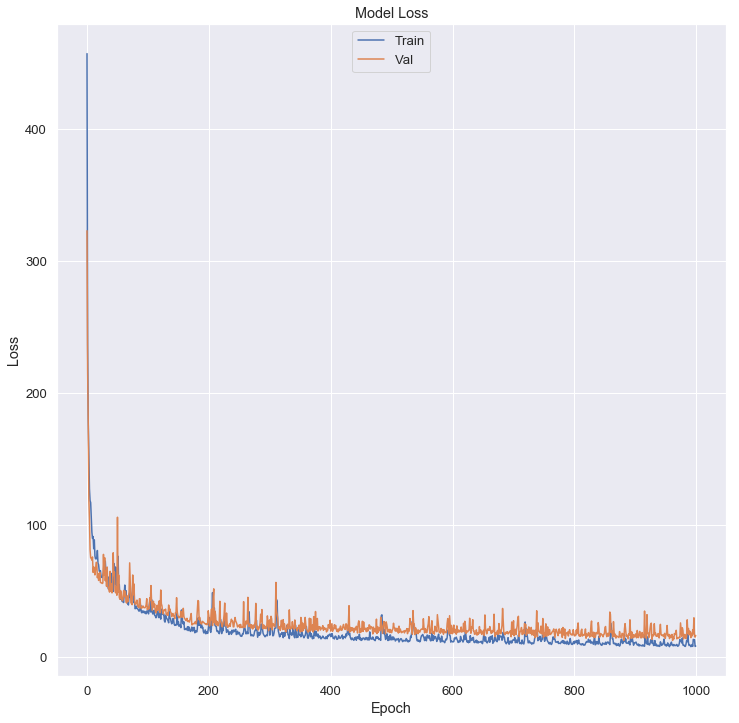

In [28]:
plt.figure(figsize=(12, 12))
# summarize history for loss
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper center")
plt.show()



**TEST THE MODEL**

The `model.fit` function iterates over the data set reducing the cost value until it reaches its minimum and outputs the result of the loss function. It can also be calculated independently using the `model.evaluate` function the result of which is seen below.

In [29]:
# MODEL EVALUATION 

model_eval = model.evaluate(x=x_train, y=y_train)

print ("Loss value is:", float("{0:.2f}".format(model_eval)))

253/253 [==============================] - 0s 24us/step
Loss value is: 12.95


In [30]:
# Create test set by dropping 'PRICE' column

bos_test = bos.drop(columns=['PRICE'])

In [31]:
#print first ten rows of dataset
print(bos[:10])

y_true = bos['PRICE']
y_pred = model.predict(x[:10])
#print(y_pred)

#calculation of mean absolute % error
percent_error = kr.losses.mean_absolute_percentage_error(y_true, y_pred)

#Output first 10 predictions
print(preds[:10])
print(percent_error)

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7

Our model has predicted a median house price of 22,812 for row 1 which is a good estimate given that the actual price was 24,000


Learnings in the **TEST MODEL** above from REF [https://www.youtube.com/watch?v=zinEPDj7SD8]

How ever subsequent predictions of house prices have been erratic.
